In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('experiment_lesson_4.csv')

In [4]:
df = data.copy()

In [5]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.3+ KB


In [7]:
df.isnull().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

Text(0.5, 1.0, 'Распределение времени доставки в тестовой группе')

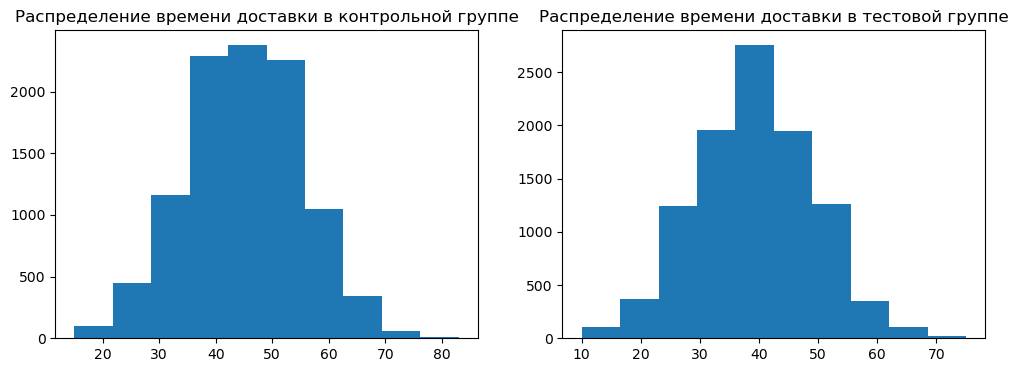

In [8]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].hist(df[df['experiment_group'] == 'control']['delivery_time'])
axes[0].set_title('Распределение времени доставки в контрольной группе')

axes[1].hist(df[df['experiment_group'] == 'test']['delivery_time'])
axes[1].set_title('Распределение времени доставки в тестовой группе')

In [9]:
control = np.array(df[df['experiment_group'] == 'control']['delivery_time'])
test = np.array(df[df['experiment_group'] == 'test']['delivery_time'])
abs(len(control) - len(test))

12

In [10]:
stats.normaltest(control)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

pval > 0.05 =>
Время доставки в контрольной группе имеет нормальное распределение при уровне значимости 0.05

In [11]:
stats.normaltest(test)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

pval < 0.05 => Время доставки в контрольной группе имеет распределение отличное от нормального при уровне значимости 0.05

In [12]:
std_test = round(test.std(),2)
std_control = round(control.std(),2)
print(f'Стандартное отклонение времени доставки в минутах в контрольной группе: {std_control}\nСтандартное отклонение времени доставки в минутах в контрольной группе: {std_test}')

Стандартное отклонение времени доставки в минутах в контрольной группе: 9.99
Стандартное отклонение времени доставки в минутах в контрольной группе: 9.88


In [13]:
df[df['experiment_group'] == 'control']['delivery_time'].describe()

count    10092.000000
mean        45.065101
std          9.990017
min         15.000000
25%         38.000000
50%         45.000000
75%         52.000000
max         83.000000
Name: delivery_time, dtype: float64

In [14]:
df[df['experiment_group'] == 'test']['delivery_time'].describe()

count    10104.000000
mean        39.046813
std          9.883308
min         10.000000
25%         32.000000
50%         39.000000
75%         46.000000
max         75.000000
Name: delivery_time, dtype: float64

Сформулируем нашу продуктовую гипотезу:\
Внедрение функции планирования последних заказов "по пути" для курьеров сократит среднее время доставки за счет оптимизации маршрутов

Формализуем:\
H0: Mcontrol = Mtest \
H1: Mcontrol != Mtest \
alpha = 0.05 \
Юзаем двувыборочный t-test

In [19]:
m = len(control)
n = len(test)
s2x = control.var()
s2y = test.var()

T = (test.mean() - control.mean())/(s2x/m + s2y/n)**0.5

df = round( (s2x/m + s2y/n)**2 / ( (s2x/m)**2/(m-1) + (s2y/n)**2/(n-1) ))
St = stats.t(df)

P = 1 - St.cdf(T)
print("Statistic: ",T,", p-value: ",P)

Statistic:  -43.037683092455666 , p-value:  1.0


In [20]:
diff = test.mean() - control.mean()
diff_perc = diff/control.mean() * 100
print(f'Среднее время доставки уменьшилось на {abs(round(diff,2))}, что составляет {round(diff_perc,2)}%')

Среднее время доставки уменьшилось на 6.02, что составляет -13.35%


В тестовой группе (где использовался новый алгоритм "по пути") среднее время доставки составило 39.05 минут, что на 6 минут меньше, чем в контрольной группе (45.07 минут).
Статистический тест (t-тест) показал, что эта разница статистически значима (p-value = 0.0) при уровне значимости 0.05

Курьеры, использующие новый алгоритм, доставляли пиццу в среднем на 6 минут (13,35%) быстрее, чем те, кто работает по старой системе.\
Результат теста говорит о том, что это улучшение — не случайность, а действительно связано с новым подходом. Это означает, что новая функция помогает курьерам быстрее доставлять заказы